In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from pg_settings import pg_yelp
from ast import literal_eval 
import seaborn 
%matplotlib inline

## Importing business and review data

In [8]:
# df_biz = pd.read_csv('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.csv')

In [9]:
# df_rev = pd.read_csv('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.csv')

In [ ]:
df_rev = pd.read_csv('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.csv')

In [117]:
print df_biz.shape
print df_rev.shape

(77445, 98)
(2225213, 10)


## Connecting to psql on the amazon cloud and writing to tables

In [18]:
engine = create_engine(pg_yelp)
c = engine.connect()
conn = c.connection

In [19]:
df_biz.to_sql('business', engine)

## Exploring reviews data

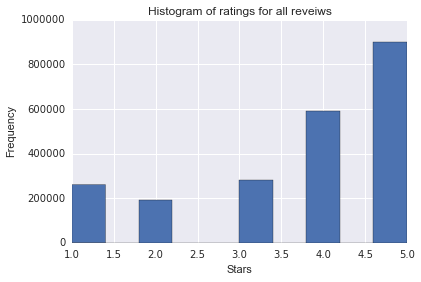

In [215]:
df_rev.stars.hist()
plt.ylabel('Frequency')
plt.xlabel('Stars')
plt.title('Histogram of ratings for all reveiws')

Notice that most ratings are 5s and that there are more 1s than 2s. Adding some support to the thought that most reveiws are polar, not mid range. Which makes sense because average experience does not provoke much action.

In [226]:
df_rev['text_length'] = df_rev.text.apply(len)

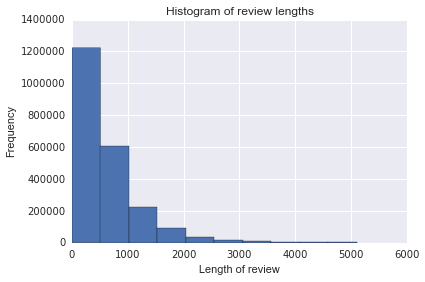

In [227]:
df_rev.text_length.hist()
plt.ylabel('Frequency')
plt.xlabel('Length of review')
plt.title('Histogram of review lengths')

In [231]:
star_groups = df_rev.groupby('stars')

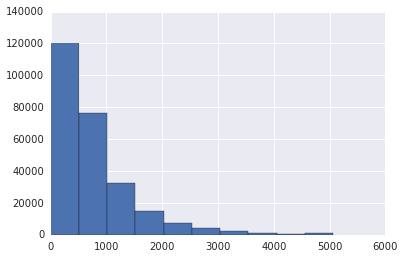

In [234]:
star_groups.get_group(1).text_length.hist()

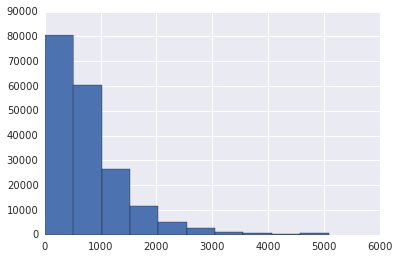

In [235]:
star_groups.get_group(2).text_length.hist()

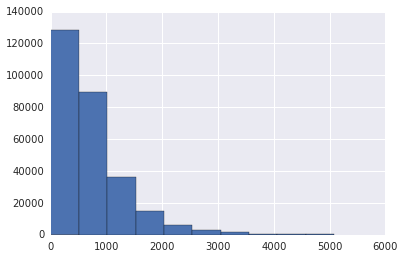

In [236]:
star_groups.get_group(3).text_length.hist()

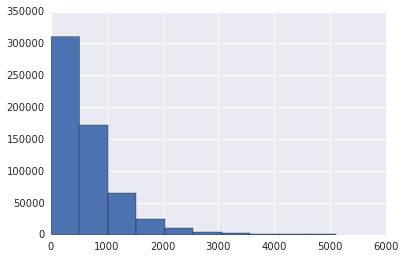

In [237]:
star_groups.get_group(4).text_length.hist()

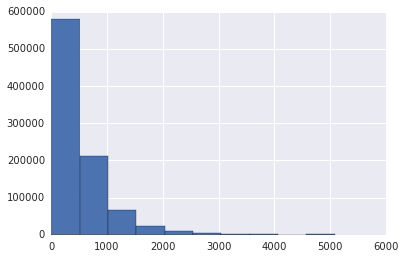

In [238]:
star_groups.get_group(5).text_length.hist()

## Creating dataframe containing only restaurants

Only looking at a subset of the features

In [33]:
cols = []
for n in df_biz.columns:
    if not n.startswith('attributes.'):
        if not n.startswith('hours.'):
            cols.append(n)

In [35]:
df_biz_sm = df_biz[cols]

In [102]:
def is_a_restaurant(category_string):
    ''' Checks to see if the business category string contains
        the "Restaurants" category'''
    
    cats = set(literal_eval(category_string))
    rest = {"Restaurants"}
    return len(cats & rest) > 0

In [115]:
criterion = df_biz_sm.categories.map(lambda y: is_a_restaurant(y))
df_rests = df_biz_sm[criterion]

Make sure that all business ids are unique.

In [120]:
print len(df_rests.business_id.unique())
print df_rests.shape

25071
(25071, 13)


## Subset reviews dataframe for all restaurants in set

In [125]:
rest_ids = df_rests.business_id

In [127]:
df_restrevs = df_rev[df_rev.business_id.isin(rest_ids)]

In [128]:
df_restrevs.shape

(1363242, 10)

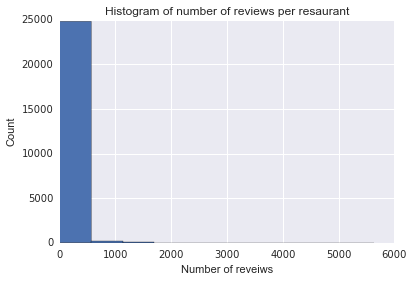

In [181]:
plt.hist(df_rests.review_count)
plt.ylabel('Count')
plt.xlabel('Number of reveiws')
plt.title('Histogram of number of reviews per resaurant')

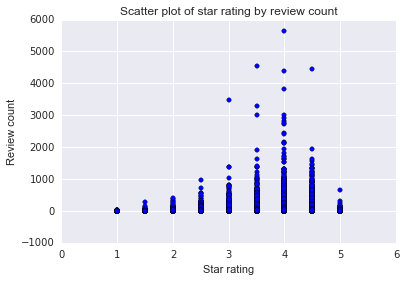

In [156]:
plt.scatter(df_rests.stars,df_rests.review_count)
plt.ylabel('Review count')
plt.xlabel('Star rating')
plt.title('Scatter plot of star rating by review count')